# Практическая работа №1: 
## Формирование и первичная обработка выборки. Нахождение и точечных и интервальных оценок. Проверка статистических гипотез
    Выполнила студентка группы 0373: Казанова Анастасия. Вариант 9.

## Цель работы: 
    Ознакомление с основными правилами формирования выборки и подготовки выборочных данных к статистическому анализу. Получение практических навыков нахождения точечных статистических оценок параметров распределения, а также вычисления интервальных статистических оценок параметров распределения выборочных данных и проверки «справедливости» статистических гипотез.

## Постановка задачи:
    * Осуществить формирование репрезентативной выборки заданного объема из имеющейся генеральной совокупности экспериментальных данных.
    * Осуществить последовательное преобразование полученной выборки в ранжированный, вариационный и интервальный ряды. 
    * Применительно к интервальному ряду построить и отобразить графически полигон, гистограмму и эмпирическую функцию распределения для абсолютных и относительных частот. 
    * Для заданных выборочных данных вычислить с использованием метода моментов и условных вариант точечные статистические оценки математического ожидания, дисперсии, среднеквадратичного отклонения, асимметрии, эксцесса, моды, медианы и коэффициента вариации исследуемой случайной величины. 
    * Для заданной надёжности определить границы доверительных интервалов для математического ожидания и среднеквадратичного отклонения случайной величины. 
    * Проверить гипотезу о нормальном распределении исследуемой случайной величины с помощью критерия Пирсона 𝜒2. Полученные результаты содержательно проинтерпретировать.

# Основные теоретические положения:

*Выборочная совокупность* — совокупность случайно отобранных объектов. Объем = n.  
*Ряд распределения* — упорядоченное распределение единиц совокупности на группы по определенному варьирующему признаку.  
*Полигон частот* — ломаная линия, соединяющая точки дискретного ряда $((x_{1}, n_{1}), (x_{2}, n_{2}) ... (x_{k}, n_{k}))$.  
*Полигон относительных частот* — ломаная линия, соединяющая точки дискретного ряда 
$((x_{1}, p_{1}^{*}), (x_{2}, p_{2}^{*}) ... (x_{k}, p_{k}^{*}))$.  
*Гистограмма* — статистический аналог функции плотности распределения случайной величины.  
*Гистограмма частот* — ступенчатая фигура, состоящая из прямоугольников, основаниями которых являются частичные интервалы, а высоты равны 
$f_{i} = $

# Выполнение работы:

In [888]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

### **Задание №1.** Сформированная выборка объема 115:

In [889]:
bivariate_sampling = pd.read_csv("forestfires.csv") 
n = 115
selection = bivariate_sampling[["temp"]]
selection

,temp
0,14.6
1,24.1
2,19.3
3,22.9
4,18.3
...,...
110,32.6
111,21.6
112,26.7
113,18.2


### **Задание №2.** Последовательно преобразовать выборку в ранжированный, вариационный и интервальный ряды. 

*Ранжированный ряд:*

In [890]:
selection_ranked = selection.sort_values(by="temp").reset_index(drop=True)
selection_ranked

,temp
0,4.6
1,4.6
2,5.1
3,5.2
4,8.2
...,...
110,27.6
111,27.8
112,31.0
113,32.4


*Вариационный ряд:*

In [891]:
selection_variation = selection_ranked.value_counts(sort=False).reset_index()
selection_variation.columns=["variation", "frequency"]
selection_variation

,variation,frequency
0,4.6,2
1,5.1,1
2,5.2,1
3,8.2,1
4,8.9,1
...,...,...
80,27.6,1
81,27.8,1
82,31.0,1
83,32.4,1


*Интервальный ряд:*

In [892]:
k = int(1+3.32*math.log(n))
min = selection_variation["variation"][0]
max = selection_variation["variation"][len(selection_variation) - 1]
h = (max - min)/k
selection_interval = selection_ranked.squeeze().value_counts(bins = k).to_frame().reset_index()
selection_interval.columns=["interval", "frequency"]
selection_interval = selection_interval.sort_values("interval").reset_index(drop=True)
selection_interval["interval"][0] = pd.Interval(left = selection_ranked["temp"][0], right = selection_interval["interval"][0].right)
selection_interval


,interval,frequency
0,"(4.6, 6.35]",4
1,"(6.35, 8.1]",0
2,"(8.1, 9.85]",3
3,"(9.85, 11.6]",7
4,"(11.6, 13.35]",7
5,"(13.35, 15.1]",8
6,"(15.1, 16.85]",14
7,"(16.85, 18.6]",16
8,"(18.6, 20.35]",13
9,"(20.35, 22.1]",11


### **Задание №3.** Для интервального ряда абсолютных частот построить и отобразить графически полигон, гистограмму и эмпирическую функцию. Сделать выводы.


In [893]:
selection_interval['interval'][0].left
print("Выведем график после этого.")



Выведем график после этого.


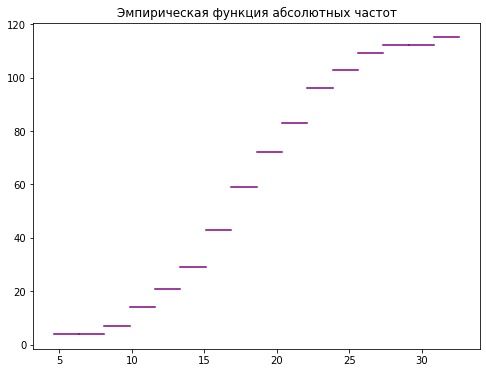

In [894]:
accumulated_freq = [0]
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(len(selection_interval)):
    accumulated_freq.append(accumulated_freq[-1] + selection_interval["frequency"][i])
    plt.plot([selection_interval["interval"][i].left, selection_interval["interval"][i].right], [accumulated_freq[-1], accumulated_freq[-1]], color="purple")
accumulated_freq.pop(0)
plt.title("Эмпирическая функция абсолютных частот")
plt.show()



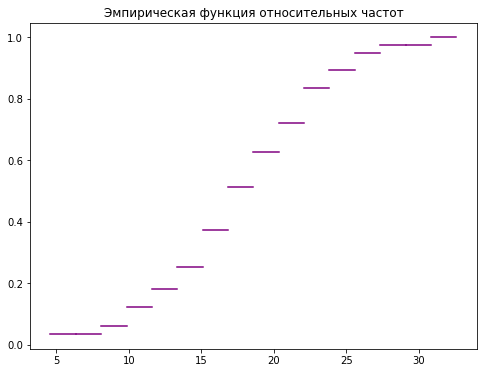

,interval,frequency,relative_freq
0,"(4.6, 6.35]",4,0.034783
1,"(6.35, 8.1]",0,0.000000
2,"(8.1, 9.85]",3,0.026087
3,"(9.85, 11.6]",7,0.060870
4,"(11.6, 13.35]",7,0.060870
5,"(13.35, 15.1]",8,0.069565
6,"(15.1, 16.85]",14,0.121739
7,"(16.85, 18.6]",16,0.139130
8,"(18.6, 20.35]",13,0.113043
9,"(20.35, 22.1]",11,0.095652


In [895]:
selection_interval["relative_freq"] = selection_interval["frequency"]/accumulated_freq[-1]
accumulated_relative_freq = [0]
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(len(selection_interval)):
    accumulated_relative_freq.append(accumulated_relative_freq[-1] + selection_interval["relative_freq"][i])
    plt.plot([selection_interval["interval"][i].left, selection_interval["interval"][i].right], [accumulated_relative_freq[-1], accumulated_relative_freq[-1]], color="purple")
accumulated_relative_freq.pop(0)
plt.title("Эмпирическая функция относительных частот")
plt.show()
selection_interval


### **Задание №5.** Для интервального ряда найти середины интервалов, а также накопленные частоты. Результаты представить в виде таблицы (в последней строке Σ необходимо записать сумму столбца):

In [896]:
middles = []
for i in range(len(selection_interval)):
    middles.append(selection_interval["interval"][i].mid)
table = pd.DataFrame(columns=["(x(i-1), x(i)]", "x(i)", "n(i)", "p*(i)", "sum(n(i))", "sum(p(i))"], index=list(range(1, len(selection_interval) + 1)).append("sum"))
table["(x(i-1), x(i)]"] = selection_interval["interval"]
table["x(i)"] = middles 
table["n(i)"] = selection_interval["frequency"]
table["p*(i)"] = selection_interval["relative_freq"]
table["sum(n(i))"] = accumulated_freq 
table["sum(p(i))"] = accumulated_relative_freq
table.loc["sum"] = ["-", "-", np.sum(table["n(i)"]), np.sum(table["p*(i)"]), "-", "-"]
table

,"(x(i-1), x(i)]",x(i),n(i),p*(i),sum(n(i)),sum(p(i))
0,"(4.6, 6.35]",5.475,4,0.034783,4,0.034783
1,"(6.35, 8.1]",7.225,0,0.000000,4,0.034783
2,"(8.1, 9.85]",8.975,3,0.026087,7,0.06087
3,"(9.85, 11.6]",10.725,7,0.060870,14,0.121739
4,"(11.6, 13.35]",12.475,7,0.060870,21,0.182609
5,"(13.35, 15.1]",14.225,8,0.069565,29,0.252174
6,"(15.1, 16.85]",15.975,14,0.121739,43,0.373913
7,"(16.85, 18.6]",17.725,16,0.139130,59,0.513043
8,"(18.6, 20.35]",19.475,13,0.113043,72,0.626087
9,"(20.35, 22.1]",21.225,11,0.095652,83,0.721739


### **Задание №6.** Для полученных вариант вычислить условные варианты. Заполнить расчётную таблицу (в последней строке Σ необходимо записать сумму столбца):


In [897]:
table_2 = pd.DataFrame(columns=["x(i)", "n(i)", "u(i)", "n(i)u(i)", "n(i)u^2(i)", "n(i)u^3(i)", "n(i)u^4(i)", "n(i)(u(i) + 1)^4"].append("sum"))
if len(selection_interval) % 2 == 0:
    false_zero = ((len(selection_interval) - 1)/2)
    if selection_interval["frequency"][math.floor(false_zero)] > selection_interval["frequency"][math.ceil(false_zero)]:
        false_zero = table["x(i)"][math.floor(false_zero)]
    else:
        false_zero = table["x(i)"][math.ceil(false_zero)]
else:
    false_zero = table["x(i)"][math.floor((len(table) - 1)/2)]
u = []
for i in range (len(table) - 1):
    u.append((table["x(i)"][i] - false_zero)/h)
n_u_1 = []
n_u_2 = []
n_u_3 = []
n_u_4 = []
n_u_plus = []
for i in range(len(u)):
    n_u_1.append(table["n(i)"][i]*u[i])
    n_u_2.append(table["n(i)"][i]*(u[i])**2)
    n_u_3.append(table["n(i)"][i]*(u[i])**3)
    n_u_4.append(table["n(i)"][i]*(u[i])**4)
    n_u_plus.append(round(table["n(i)"][i]*(u[i] + 1)**4, 1))
table_2["x(i)"] = table["x(i)"][:len(table) - 1]
table_2["n(i)"] = table["n(i)"]
table_2["u(i)"] = u
table_2["n(i)u(i)"] = n_u_1
table_2["n(i)u^2(i)"] = n_u_2
table_2["n(i)u^3(i)"] = n_u_3
table_2["n(i)u^4(i)"] = n_u_4
table_2["n(i)(u(i) + 1)^4"] = n_u_plus
table_2.loc["sum"] = ["-", np.sum(table_2["n(i)"]), "-", np.sum(n_u_1), np.sum(n_u_2), np.sum(n_u_3), np.sum(n_u_4), np.sum(n_u_plus)]
table_2




,x(i),n(i),u(i),n(i)u(i),n(i)u^2(i),n(i)u^3(i),n(i)u^4(i),n(i)(u(i) + 1)^4
0,5.475,4,-7.0,-28.0,196.0,-1372.0,9604.0,5184.0
1,7.225,0,-6.0,-0.0,0.0,-0.0,0.0,0.0
2,8.975,3,-5.0,-15.0,75.0,-375.0,1875.0,768.0
3,10.725,7,-4.0,-28.0,112.0,-448.0,1792.0,567.0
4,12.475,7,-3.0,-21.0,63.0,-189.0,567.0,112.0
5,14.225,8,-2.0,-16.0,32.0,-64.0,128.0,8.0
6,15.975,14,-1.0,-14.0,14.0,-14.0,14.0,0.0
7,17.725,16,0.0,0.0,0.0,0.0,0.0,16.0
8,19.475,13,1.0,13.0,13.0,13.0,13.0,208.0
9,21.225,11,2.0,22.0,44.0,88.0,176.0,891.0


### **Задание №7.**  Вычислить условные эмпирические моменты 𝜈𝑖 через условные варианты. С помощью условных эмпирических моментов вычислить центральные эмпирические моменты 𝜇𝑖.

In [898]:
v = []
r = 4
for i in range(r):
    v.append(1/n*table_2.loc["sum"][i+3])
m = np.zeros(4)
m[1] = (v[1]-v[0]**2)*h**2
m[2] = (v[2] - 3*v[1]*v[0] + 2*v[0]**3)*h**3
m[3] = (v[3] - 4*v[2]*v[0] + 6*v[1]*v[0]**2 - 3*v[0]**4)*h**4
table_3 = pd.DataFrame(columns=["v*(i)", "m*(i)"], index=range(1, r + 1))
table_3["v*(i)"] = v
table_3["m*(i)"] = m
table_3


,v*(i),m*(i)
1,0.452174,0.000000
2,10.678261,32.076011
3,11.930435,-12.701473
4,321.217391,2931.969856


### **Задание №8.** Вычислить выборочные среднее и дисперсию с помощью стандартной формулы и с помощью условных вариант. Убедиться, что результаты совпадают

In [899]:
x_v = np.sum(selection_ranked["temp"])/n
D = 0
for i in range(n):
    D +=(selection_ranked["temp"][i] - x_v)**2/n
x_v_2 = v[0]*h + false_zero
D_2 = m[1]
print("Выборочное среднее через стандартную формулу: ", x_v)
print("Выборочное среднее через условные варианты: ", x_v_2)
print("Дисперсия через стандартную формулу: ", D)
print("Дисперсия через условные варианты: ", D_2)

Выборочное среднее через стандартную формулу:  18.49913043478261
Выборочное среднее через условные варианты:  18.51630434782609
Дисперсия через стандартную формулу:  32.37052098298676
Дисперсия через условные варианты:  32.07601134215502


### **Задание №9.** Вычислить исправленную выборочную дисперсию и исправленноеСКО. Сравнить данные оценки с смещёнными оценками дисперсиии СКО.

In [900]:
sigma = math.sqrt(D)
D_s = n/(n - 1)*D
sigma_s = math.sqrt(D_s)
print("Исправленная выборочная дисперсия: ", D_s)
print("Смещенное СКО: ", sigma)
print("Исправленное СКО: ", sigma_s)

Исправленная выборочная дисперсия:  32.654472921434014
Смещенное СКО:  5.689509731337733
Исправленное СКО:  5.714409236433283


### **Задание №10.** Найти статистическую оценку коэффициентов асимметрии и эксцесса. Сделать выводы.


In [901]:
a = m[2]/sigma**3
excess = m[3]/sigma**4 - 3
print("Коэффициент ассиметрии :", a)
print("Эксцесс равен :", excess)

Коэффициент ассиметрии : -0.06896512921425564
Эксцесс равен : -0.20192002966170364


Коэффициент асимметрии характеризует скошенность распределения относительно самого высокого участка по отношению к математическому ожиданию. Получили отрицательную ассиметрию, значит большая часть кривой расположена слева от математического ожидания.  
Эксцесс характеризует подъем кривой теоретического распределения по сравнению с нормальной кривой. 
Получили отрицательный эксцесс, значит кривая более плосковершинная. 

### **Задание №11.** Вычислить моду, медиану и коэффициент вариации для заданного распределения. Сделать выводы.

In [902]:
#считаем для интервального ряда 
max_freq = np.max(selection_interval["frequency"])
moda_x = 0
index_x = 0
for i in range(len(selection_interval)):
    if (selection_interval["frequency"][i] == max_freq):
        moda_x = selection_interval["interval"][i].left #нашли левую границу интервала
        index_x = i #нашли индекс интервального ряда, чтобы потом обращаться к частотам пред. и след. интервалов 
moda = moda_x + h*((max_freq - selection_interval["frequency"][index_x - 1])/(max_freq*2 - selection_interval["frequency"][index_x - 1] - selection_interval["frequency"][index_x + 1]))
print("Мода интервального ряда: ", moda)
mediana = 0 
index = 0
while (table["sum(n(i))"][index] < table["sum(n(i))"][len(selection_interval)-1]/2):
    index += 1
mediana_x = selection_interval["interval"][index].left
mediana = mediana_x + h/(table["p*(i)"][index])*(0.5 - table["sum(p(i))"][index-1])
print("Медиана: ", mediana)
k_var = sigma/abs(x_v)*100
print("Коэффициент вариации: ", k_var, "%")

Мода интервального ряда:  17.55
Медиана:  18.4359375
Коэффициент вариации:  30.755552275258026 %


Получили коэффициент вариации менее 33%, значит выборочная совокупность однородная. 

### **Задание №12.** Вычислить точность и доверительный интервал для математического ожидания при неизвестном среднеквадратичном отклонении при заданном объёме выборки для доверительной точности 𝛾 ∈ {0.95, 0.99}. Сделать выводы.